In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time 

df = pd.read_pickle('data/pkl/PreciosBlue.xlsx.pkl')
df

,Fecha,Compra,Venta
0,2023-02-03,375.0,379.0
1,2023-02-03,374.0,378.0
2,2023-02-02,373.0,377.0
3,2023-02-01,377.0,381.0
4,2023-01-31,379.0,383.0
...,...,...,...
3233,2023-02-04,0.0,379.0
3234,2023-02-04,0.0,379.0
3235,2023-02-04,0.0,379.0
3236,2023-02-04,0.0,379.0


In [2]:
# renaming for fbprophet
df.rename(columns={'Fecha':'ds'}, inplace=True)
df.rename(columns={'Venta':'y'}, inplace=True)
df.reset_index(inplace=True)
df.head()

,index,ds,Compra,y
0,0,2023-02-03,375.0,379.0
1,1,2023-02-03,374.0,378.0
2,2,2023-02-02,373.0,377.0
3,3,2023-02-01,377.0,381.0
4,4,2023-01-31,379.0,383.0


In [3]:
df.rename(columns={'Fecha':'ds'}, inplace=True)

In [4]:
df = df[df['ds'] >= '2018-01-01']

df

,index,ds,Compra,y
0,0,2023-02-03,375.0,379.0
1,1,2023-02-03,374.0,378.0
2,2,2023-02-02,373.0,377.0
3,3,2023-02-01,377.0,381.0
4,4,2023-01-31,379.0,383.0
...,...,...,...,...
3233,3233,2023-02-04,0.0,379.0
3234,3234,2023-02-04,0.0,379.0
3235,3235,2023-02-04,0.0,379.0
3236,3236,2023-02-04,0.0,379.0


In [5]:
df.drop(['Compra'], axis=1)

,index,ds,y
0,0,2023-02-03,379.0
1,1,2023-02-03,378.0
2,2,2023-02-02,377.0
3,3,2023-02-01,381.0
4,4,2023-01-31,383.0
...,...,...,...
3233,3233,2023-02-04,379.0
3234,3234,2023-02-04,379.0
3235,3235,2023-02-04,379.0
3236,3236,2023-02-04,379.0


In [6]:
df = df.sort_values(by='ds')

In [7]:
df

,index,ds,Compra,y
1277,1277,2018-01-02,18.85,19.25
1276,1276,2018-01-03,18.89,19.29
1275,1275,2018-01-04,19.01,19.41
1274,1274,2018-01-05,19.05,19.45
1273,1273,2018-01-08,19.18,19.58
...,...,...,...,...
3233,3233,2023-02-04,0.00,379.00
3234,3234,2023-02-04,0.00,379.00
3235,3235,2023-02-04,0.00,379.00
3236,3236,2023-02-04,0.00,379.00


In [8]:
df['y'].round(2).describe()

count    1292.000000
mean      134.890023
std        94.538923
min        19.250000
25%        44.000000
50%       134.500000
75%       196.500000
max       386.000000
Name: y, dtype: float64

In [9]:
from prophet import Prophet

prophet_model = Prophet()
prophet_model.fit(df)

14:06:54 - cmdstanpy - INFO - Chain [1] start processing
14:06:55 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future_dataset= prophet_model.make_future_dataframe(periods=1, freq='y') # Data para el proximo año
future_dataset.tail()

,ds
1240,2023-02-01
1241,2023-02-02
1242,2023-02-03
1243,2023-02-04
1244,2023-12-31


In [11]:
pred = prophet_model.predict(future_dataset)
pred[['ds','yhat', 'yhat_lower', 'yhat_upper']].head() # only useful columns

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-02,23.590689,10.298934,36.749982
1,2018-01-03,24.623920,12.601657,38.455392
2,2018-01-04,24.908267,12.244370,37.688015
3,2018-01-05,25.331339,12.498530,37.152681
4,2018-01-08,25.452639,11.851827,37.892331


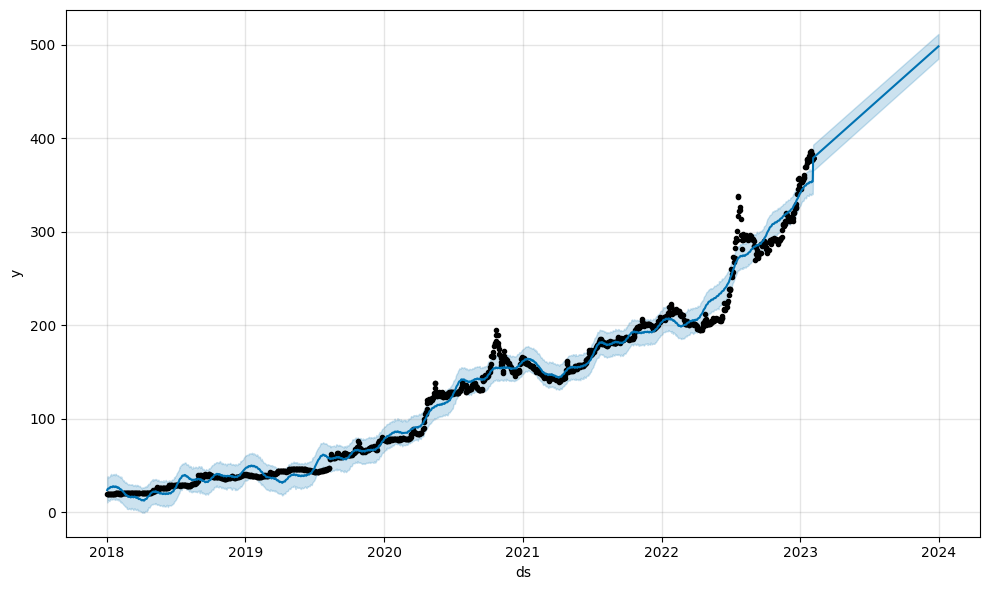

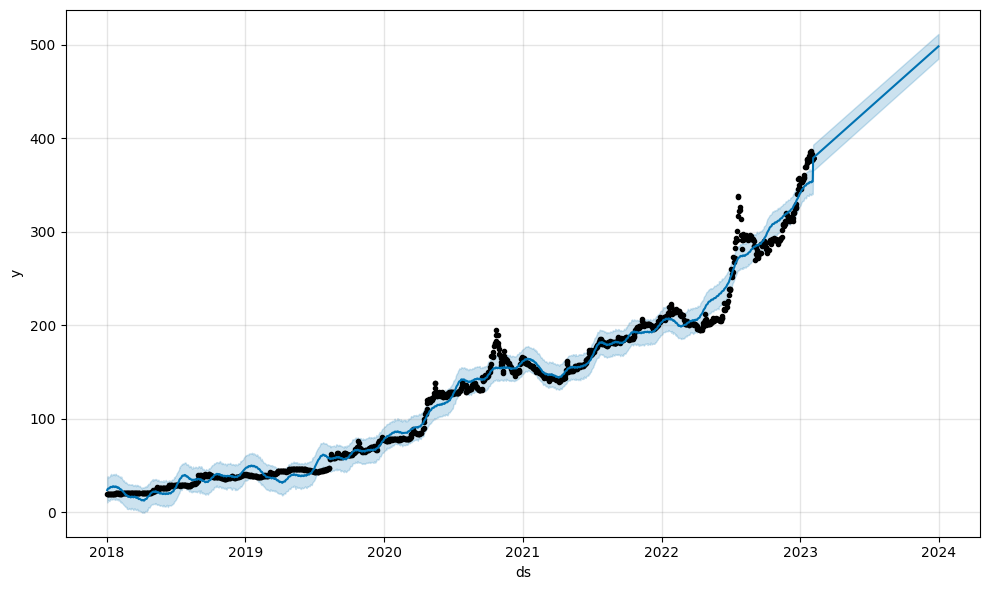

In [12]:
prophet_model.plot(pred)

In [13]:
def fb_prophet_function(data, future_years, seasonality_name, seasonality_val,seasonality_fourier, **params):
    """
    Trains a fb prophet model on given hyperparameters and custom
    seasonality, predicts on future dataset, plot the results and
    return the model.
    """
    start= time.time()
    prophet_model = Prophet(**params)
    
    prophet_model.add_seasonality(name=seasonality_name, period=seasonality_val, fourier_order=seasonality_fourier)
        
    prophet_model.fit(data)
    
    future_dataset = prophet_model.make_future_dataframe(periods=future_years, freq='y')
    
    pred = prophet_model.predict(future_dataset)
    
    prophet_model.plot(pred, figsize=(15,7));
    plt.ylim(-500, 3000)
    plt.title(f"fourier order{seasonality_fourier}, seasonality time {seasonality_name}")
    plt.show()
    
    end = time.time()
    print(f"Total Execution Time {end-start} seconds")
    return prophet_model

In [14]:
def plot_valid(validation_set, size, model):
    pred = model.predict(validation_set)
    temp = df[-size:].copy().reset_index()
    temp['pred']=pred['yhat']
    temp.set_index('ds')[['y', 'pred']].plot()
    plt.tight_layout();

14:06:59 - cmdstanpy - INFO - Chain [1] start processing
14:07:52 - cmdstanpy - INFO - Chain [1] done processing


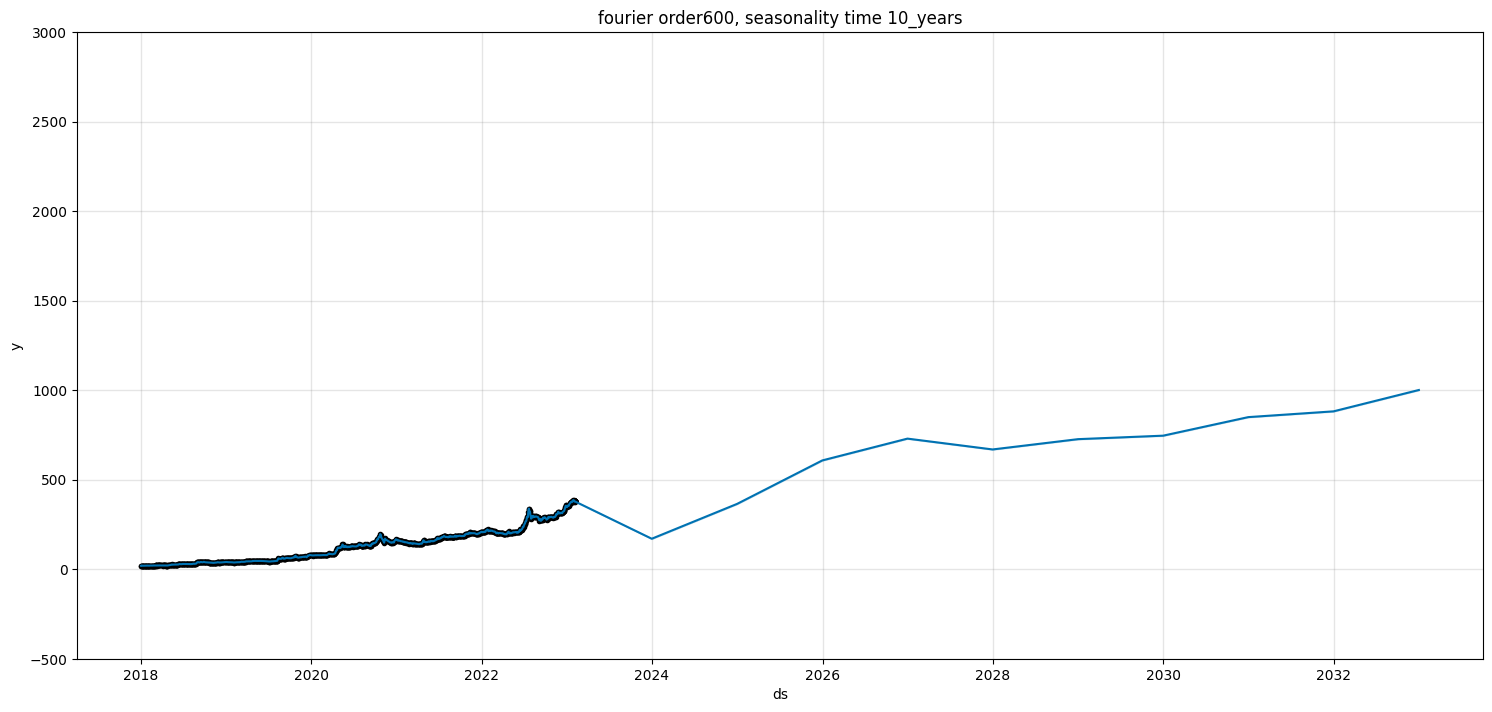

Total Execution Time 57.125959157943726 seconds


In [15]:
import time

training_set = df
validation_set = df 

ten_years = fb_prophet_function(data=training_set, future_years=10, seasonality_name='10_years', seasonality_val=365*10, seasonality_fourier=600,seasonality_mode='additive')

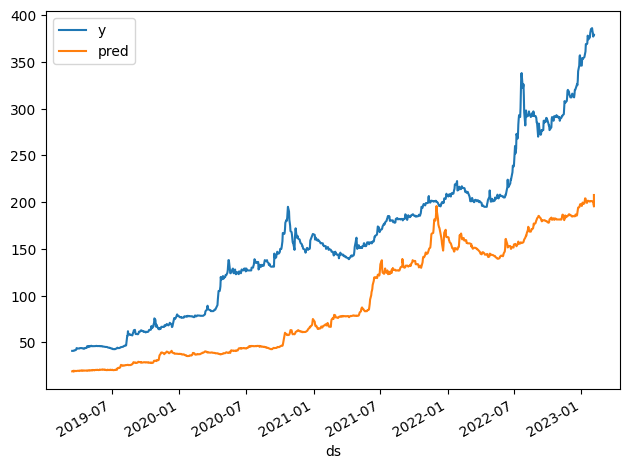

In [16]:
plot_valid(validation_set, 1000, ten_years)

In [17]:
pred = pred[['ds', 'yhat']]

pred

,ds,yhat
0,2018-01-02,23.590689
1,2018-01-03,24.623920
2,2018-01-04,24.908267
3,2018-01-05,25.331339
4,2018-01-08,25.452639
...,...,...
1240,2023-02-01,353.905765
1241,2023-02-02,353.836343
1242,2023-02-03,353.912756
1243,2023-02-04,379.001913


In [18]:
validation_set = validation_set[['ds', 'y']]

validation_set

,ds,y
1277,2018-01-02,19.25
1276,2018-01-03,19.29
1275,2018-01-04,19.41
1274,2018-01-05,19.45
1273,2018-01-08,19.58
...,...,...
3233,2023-02-04,379.00
3234,2023-02-04,379.00
3235,2023-02-04,379.00
3236,2023-02-04,379.00


In [19]:
pred = pred[pred['ds'].isin(validation_set['ds'])]

pred

,ds,yhat
0,2018-01-02,23.590689
1,2018-01-03,24.623920
2,2018-01-04,24.908267
3,2018-01-05,25.331339
4,2018-01-08,25.452639
...,...,...
1239,2023-01-31,353.232606
1240,2023-02-01,353.905765
1241,2023-02-02,353.836343
1242,2023-02-03,353.912756


In [20]:
merged1 = pd.merge(pred, validation_set, on='ds', how='inner')

validation_ds_y = merged1[['ds', 'y']]
pred_ds_yhat = merged1[['ds', 'yhat']]


In [21]:
validation_ds_y['ds'] = validation_ds_y['ds'].apply(lambda x: x.timestamp())
pred_ds_yhat['ds'] = pred_ds_yhat['ds'].apply(lambda x: x.timestamp())

C:\Users\rodri\AppData\Local\Temp\ipykernel_17912\2616818827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_ds_y['ds'] = validation_ds_y['ds'].apply(lambda x: x.timestamp())
C:\Users\rodri\AppData\Local\Temp\ipykernel_17912\2616818827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_ds_yhat['ds'] = pred_ds_yhat['ds'].apply(lambda x: x.timestamp())


In [22]:
validation_ds_y['ds'] = validation_ds_y['ds'].astype(float)
pred_ds_yhat['ds'] = pred_ds_yhat['ds'].astype(float)

C:\Users\rodri\AppData\Local\Temp\ipykernel_17912\476390056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_ds_y['ds'] = validation_ds_y['ds'].astype(float)
C:\Users\rodri\AppData\Local\Temp\ipykernel_17912\476390056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_ds_yhat['ds'] = pred_ds_yhat['ds'].astype(float)


In [23]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mae1 = mean_absolute_error(validation_ds_y, pred_ds_yhat)
mse1 = mean_squared_error(validation_ds_y, pred_ds_yhat)
rmse1 = math.sqrt(mean_squared_error(validation_ds_y, pred_ds_yhat))

print("Mean Absolute Error: ", mae1)
print("Mean Squared Error: ", mse1)
print("Root Mean Squared Error: ", rmse1)


Mean Absolute Error:  3.6455071106515367
Mean Squared Error:  51.984650246693164
Root Mean Squared Error:  7.210038158476913


In [24]:
df = df[df['ds'] >= '2021-01-01']

df

,index,ds,Compra,y
542,542,2021-01-04,159.0,165.0
541,541,2021-01-05,154.0,160.0
540,540,2021-01-06,154.0,160.0
539,539,2021-01-07,156.0,162.0
538,538,2021-01-08,155.0,161.0
...,...,...,...,...
3233,3233,2023-02-04,0.0,379.0
3234,3234,2023-02-04,0.0,379.0
3235,3235,2023-02-04,0.0,379.0
3236,3236,2023-02-04,0.0,379.0


14:07:59 - cmdstanpy - INFO - Chain [1] start processing
14:08:24 - cmdstanpy - INFO - Chain [1] done processing


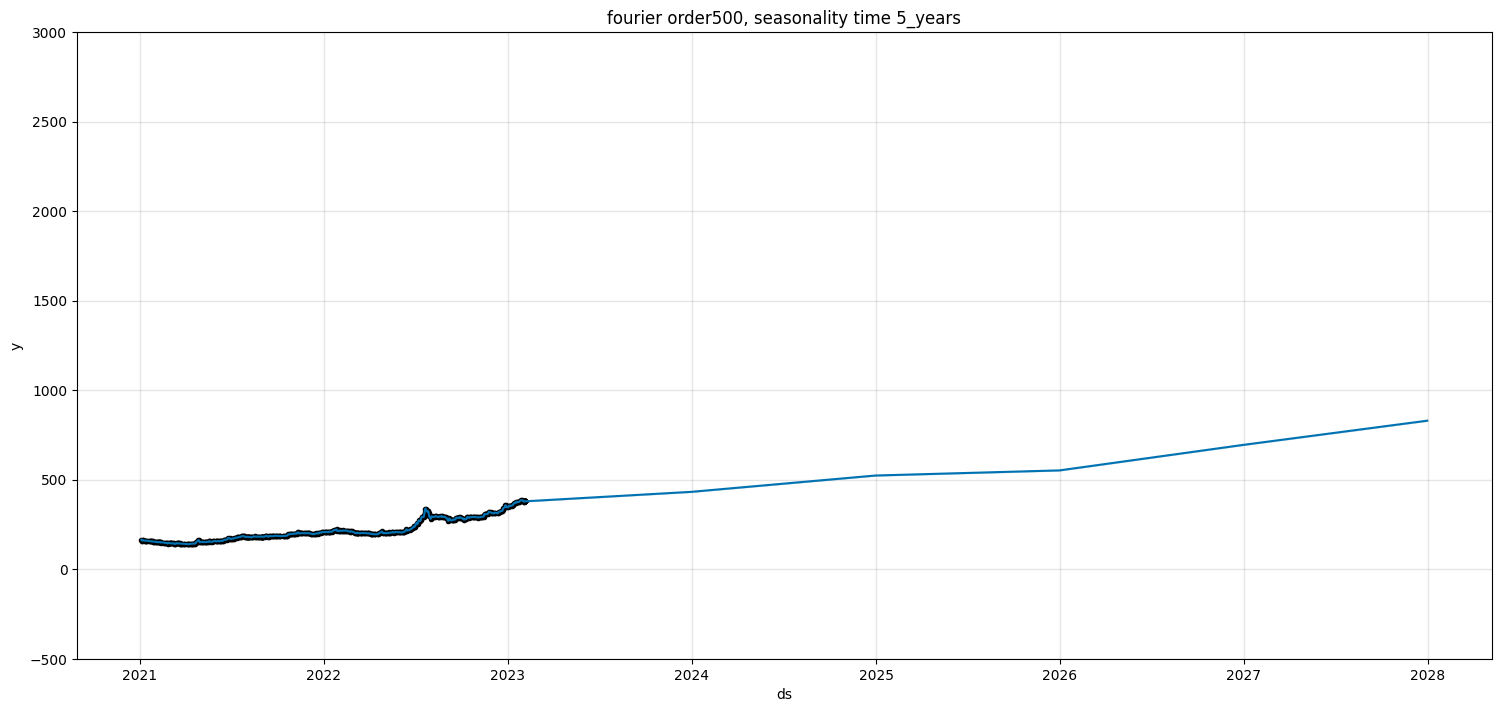

Total Execution Time 27.527952671051025 seconds


In [25]:
training_set = df
validation_set = df

five_years_model = fb_prophet_function(data=training_set, future_years=5, seasonality_name='5_years', seasonality_val=365*5, seasonality_fourier=500,seasonality_mode='additive')

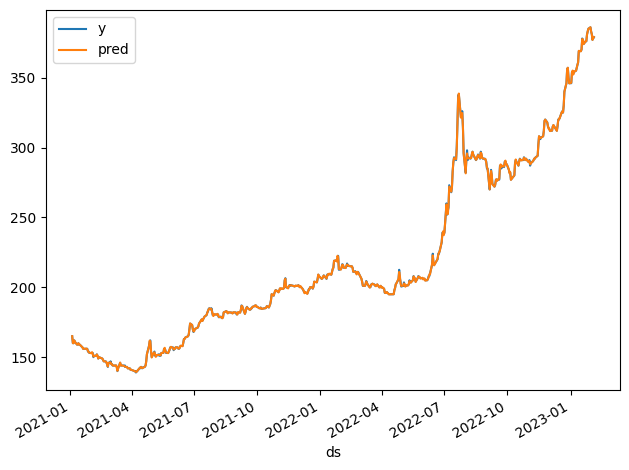

In [26]:
plot_valid(validation_set, 1000, five_years_model)

In [27]:
from prophet.diagnostics import cross_validation, performance_metrics

model = Prophet()
model.fit(df)

df_cv = cross_validation(model, initial='360 days', period='180 days', horizon = '365 days')
df_p = performance_metrics(df_cv, rolling_window=0.1) 
 
df_p.head()

14:08:26 - cmdstanpy - INFO - Chain [1] start processing
14:08:27 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/1 [00:00<?, ?it/s]

14:08:27 - cmdstanpy - INFO - Chain [1] start processing
14:08:27 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,35 days,220.561737,14.851321,12.016490,0.058774,0.043169,0.056226,0.153846
1,38 days,249.239859,15.787332,12.959414,0.063526,0.044428,0.060642,0.153846
2,39 days,278.831730,16.698255,13.952276,0.068517,0.061208,0.065287,0.115385
3,40 days,305.970312,17.492007,14.955977,0.073492,0.083355,0.069950,0.076923
4,41 days,333.583059,18.264256,15.912074,0.078249,0.095637,0.074390,0.038462


In [28]:
from sklearn.metrics import mean_squared_error
pred = pred[['ds', 'yhat']]

pred
validation_set = validation_set[['ds', 'y']]

validation_set
pred = pred[pred['ds'].isin(validation_set['ds'])]

pred
merged2 = pd.merge(pred, validation_set, on='ds', how='inner')

validation_ds_y = merged2[['ds', 'y']]
pred_ds_yhat = merged2[['ds', 'yhat']]

validation_ds_y['ds'] = validation_ds_y['ds'].apply(lambda x: x.timestamp())
pred_ds_yhat['ds'] = pred_ds_yhat['ds'].apply(lambda x: x.timestamp())
validation_ds_y['ds'] = validation_ds_y['ds'].astype(float)
pred_ds_yhat['ds'] = pred_ds_yhat['ds'].astype(float)
import math

mae2 = mean_absolute_error(validation_ds_y, pred_ds_yhat)
mse2 = mean_squared_error(validation_ds_y, pred_ds_yhat)
rmse2 = math.sqrt(mean_squared_error(validation_ds_y, pred_ds_yhat))

print("Mean Absolute Error: ", mae2)
print("Mean Squared Error: ", mse2)
print("Root Mean Squared Error: ", rmse2)


Mean Absolute Error:  4.413804807389355
Mean Squared Error:  81.28180309163032
Root Mean Squared Error:  9.015642134181586


C:\Users\rodri\AppData\Local\Temp\ipykernel_17912\4273972159.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_ds_y['ds'] = validation_ds_y['ds'].apply(lambda x: x.timestamp())
C:\Users\rodri\AppData\Local\Temp\ipykernel_17912\4273972159.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_ds_yhat['ds'] = pred_ds_yhat['ds'].apply(lambda x: x.timestamp())
C:\Users\rodri\AppData\Local\Temp\ipykernel_17912\4273972159.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [29]:
from prophet import Prophet

five_years_model = Prophet(seasonality_mode='additive', seasonality_prior_scale=1, 
                         yearly_seasonality=True, weekly_seasonality=False, 
                         daily_seasonality=False)


In [30]:
five_years_model.add_seasonality(name='1_years', period=365*1, fourier_order=90)

In [31]:
import datetime

today = datetime.datetime.now()
next_month = today + datetime.timedelta(days=90)
start_date = today.strftime("%Y-%m-%d")
end_date = next_month.strftime("%Y-%m-%d")
date_range = pd.date_range(start_date, end_date)
next_month = pd.DataFrame({"ds": date_range})


In [32]:
five_years_model.fit(training_set)

prediction = five_years_model.predict(next_month)

14:08:30 - cmdstanpy - INFO - Chain [1] start processing
14:08:37 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
values = prediction['yhat']

values_new = pd.DataFrame(values)

values_new = values_new.rename(columns={'yhat':'Values'})

values_new

,Values
0,379.439184
1,379.058820
2,379.388562
3,381.144469
4,383.327709
...,...
86,397.331802
87,399.674596
88,401.400547
89,401.528551


In [34]:
# import the datetime library
import datetime

# define the start date (today + 1) and the number of days in the range
start_date = datetime.datetime.today() + datetime.timedelta(days=1)
num_days = len(values_new.index)

# create the date range
date_range = [start_date.date() + datetime.timedelta(days=i) for i in range(num_days)]

# set the index of the dataframe to the date range
values_new.index = date_range

values_new


,Values
2023-02-05,379.439184
2023-02-06,379.058820
2023-02-07,379.388562
2023-02-08,381.144469
2023-02-09,383.327709
...,...
2023-05-02,397.331802
2023-05-03,399.674596
2023-05-04,401.400547
2023-05-05,401.528551


In [35]:
values_new.to_excel("data/xlsx/values_newBlue.xlsx")

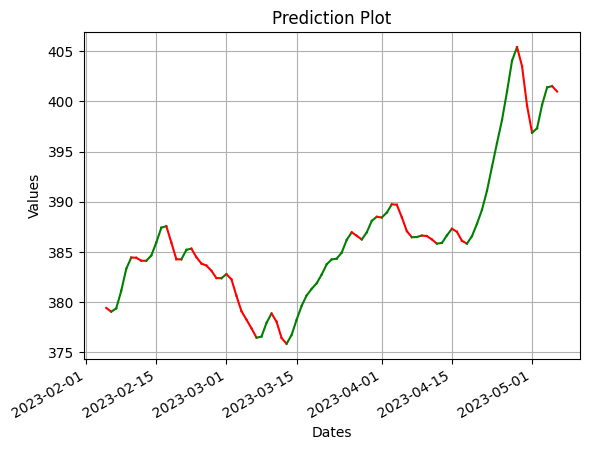

In [36]:
x = values_new.index
y = values_new['Values']
for i in range(1, len(values_new)):
    if y[i] > y[i-1]:
        color = 'g'
    else:
        color = 'r'
    plt.plot(x[i-1:i+1], y[i-1:i+1], color=color)
plt.xlabel("Dates")
plt.ylabel("Values")
plt.title("Prediction Plot")
plt.grid()
plt.gcf().autofmt_xdate()
plt.show()


In [37]:
import plotly.graph_objs as go
import plotly.offline as pyo

data = []
for i in range(1, len(values_new)):
    if y[i] > y[i-1]:
        color = 'green'
    else:
        color = 'red'
    trace = go.Scatter(x=x[i-1:i+1], y=y[i-1:i+1], mode='lines', line=dict(color=color, width=1), showlegend=False)
    data.append(trace)

layout = go.Layout(title='Prediccion Dolar Blue', xaxis=dict(title='Fecha'), yaxis=dict(title='Valores'))
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [38]:
with open('data/html/Predicciones/Pred_DolarBlue.html', 'w') as f:
    f.write(fig.to_html(include_plotlyjs='cdn'))